# Лабораторная работа №2

## Задание:

#### Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
#### Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи: 
#### обработку пропусков в данных;
#### кодирование категориальных признаков;
#### масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import MissingIndicator

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# проверим есть ли пропущенные значения
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
# Пример удаления колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((13320, 9), (13320, 4))

In [5]:
# Пример удаления строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((13320, 9), (7496, 9))

In [6]:
# Список колонок с типами данных
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

# Обработка пропусков в данных

### Заполним пропуски в числовых данных


In [7]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [8]:
#заполним пропуски для 'bath' наиболее частым значением
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['bath'] = imp1.fit_transform(data[['bath']])
np.unique(data['bath'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 18., 27., 40.])

In [9]:
data['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [10]:
#заполним пропуски для 'balcony' наиболее частым значением
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')
data['balcony'] = imp2.fit_transform(data[['balcony']])
np.unique(data['balcony'])

array([0., 1., 2., 3.])

In [11]:
# проверим есть ли пропущенные значения
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

#### после заполнения пустых значений в числовых данных, переведем тип данных колонок в int, так как данные признаки отвечают за количество комнат в доме

In [12]:
data = data.astype({'bath': int, 'balcony': int})
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath              int64
balcony           int64
price           float64
dtype: object

### Заполнение пропусков в категориальных данных

In [13]:
data['location'].isnull().sum()

1

In [14]:
#удалим одну строку с пустым значением в 'location'
data = data.dropna(subset=['location'], how='any') 
data['location'].isnull().sum()

0

In [15]:
# Импьютируем наиболее частыми значениями пустые данные в 'society'
imp3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['society'] = imp3.fit_transform(data[['society']])
data['society'].unique()

array(['Coomee ', 'Theanmp', 'GrrvaGr', ..., 'SJovest', 'ThhtsV ',
       'RSntsAp'], dtype=object)

In [16]:
# Импьютируем константой пустые данные в 'size'
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data['size'] = imp3.fit_transform(data[['size']])
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', 'NA', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
# проверим есть ли пропущенные значения
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### данные преобразованы, можно переходить к следующему шагу

# Преобразование категориальных признаков в числовые

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [20]:
#Кодируем 'area_type' целочисленными значениями
letypearea = LabelEncoder()
learrarea = letypearea.fit_transform(data['area_type'])
data['area_type'] = learrarea
data['area_type'].unique()

array([3, 2, 0, 1])

In [21]:
letypearea.classes_

array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
data_oe = data[['size', 'society', 'total_sqft']]
data_oe.head()

,size,society,total_sqft
0,2 BHK,Coomee,1056
1,4 Bedroom,Theanmp,2600
2,3 BHK,GrrvaGr,1440
3,3 BHK,Soiewre,1521
4,2 BHK,GrrvaGr,1200


In [24]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe)
cat_enc_oe

array([[  13.,  464.,   70.],
       [  19., 2439., 1288.],
       [  16.,  806.,  514.],
       ...,
       [  13., 1216.,  172.],
       [  18., 2205., 1680.],
       [   0.,  806., 1747.]])

In [25]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['2 BHK', 'Coomee ', '1056'],
       ['4 Bedroom', 'Theanmp', '2600'],
       ['3 BHK', 'GrrvaGr', '1440'],
       ...,
       ['2 BHK', 'Mahla T', '1141'],
       ['4 BHK', 'SollyCl', '4689'],
       ['1 BHK', 'GrrvaGr', '550']], dtype=object)

# Масштабирование данных

### MinMax масштабирование

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [27]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['price']])

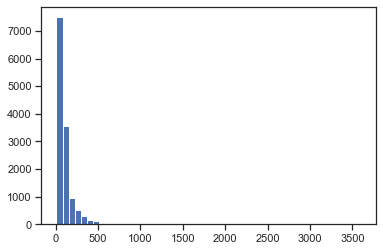

In [28]:
plt.hist(data['price'], 50)
plt.show()

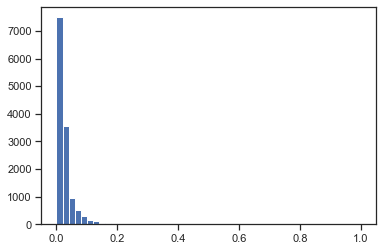

In [29]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [30]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['price']])

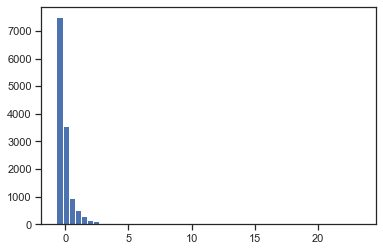

In [31]:
plt.hist(sc2_data, 50)
plt.show()